In [1]:
import pandas as pd
import numpy as np
import hashlib
from itertools import combinations
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from philharmonic.utils import load_cluster_json

In [6]:
# Initial Files
cluster_file_path = "/home/ssledzieski/philharmonic_results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_clusters.functional.json"
network_file_path = "/home/ssledzieski/philharmonic_results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_network.positive.tsv"
go_map_path = "/home/ssledzieski/philharmonic_results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_GO_map.csv"

GO_SLIM = "/home/ssledzieski/philharmonic_results/p_damicornis/20240917-pdamAll-phil_v0.3.0/goslim_generic.obo"

# Gene Expression Data
expression_file_path = "/mnt/home/ssledzieski/database/philharmonic/p_damicornis/Connelly2022_AxH_Pdam.counts"

In [3]:
cluster_dict = load_cluster_json(cluster_file_path)

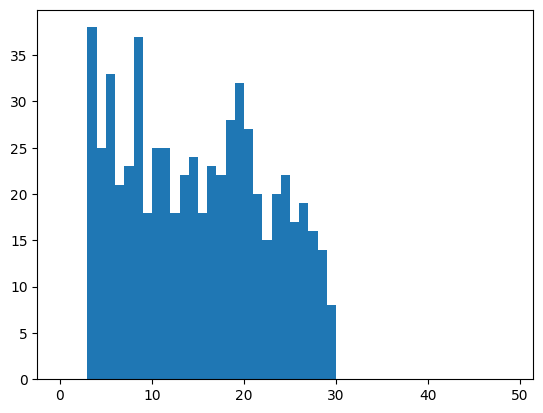

In [5]:
cluster_sizes = [len(c["members"]) for c in cluster_dict.values()]
plt.hist(cluster_sizes, bins=np.arange(0, 50, 1))
plt.show()

In [12]:
counts = pd.read_csv(expression_file_path, sep="\t", skiprows=1)
counts.columns = [i.split("/")[-1].split("_")[0] for i in counts.columns]
counts["Geneid"] = counts["Geneid"] + "-RA"
counts = counts.set_index("Geneid")
counts = counts.iloc[:, 5:]
counts.head()

,Hw1-1a,Hw1-1b,Hw1-1c,Hw1-4a,Hw1-4b,Hw1-4c,Hw1-5a,Hw1-5b,Hw1-5c,Hw1-6a,Hw1-6b,Hw1-6c,Hw2-1a,Hw2-1b,Hw2-1c,Hw2-4a,Hw2-4b,Hw2-4c,Hw2-5a,Hw2-5b,Hw2-5c,Hw2-6b,Hw2-6c,Wt1-1a,Wt1-1b,Wt1-1c,Wt1-4a,Wt1-4b,Wt1-4c,Wt1-5a,Wt1-5b,Wt1-5c,Wt1-6a,Wt1-6b,Wt1-6c,Wt2-1a,Wt2-1b,Wt2-1c,Wt2-4a,Wt2-4b,Wt2-4c,Wt2-5a,Wt2-5b,Wt2-5c,Wt2-6a,Wt2-6b,Wt2-6c
Geneid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
pdam_00021773-RA,292,72,77,26,8,37,353,51,271,380,389,88,2,30,20,2,8,7,38,30,57,37,13,25,0,41,8,12,2,11,19,26,32,9,11,72,4,6,5,34,16,30,23,2,28,13,25
pdam_00021770-RA,129,214,147,163,181,250,286,386,341,268,381,285,183,261,242,203,282,231,396,449,268,411,337,231,191,254,201,184,229,187,441,342,516,392,444,485,194,201,236,440,492,366,340,213,441,380,347
pdam_00021774-RA,60,27,31,44,47,62,43,108,107,67,90,82,17,98,27,35,49,41,62,67,58,70,77,36,16,28,28,53,33,43,41,88,188,99,169,60,33,14,26,61,64,86,50,34,86,64,55
pdam_00021775-RA,0,0,0,0,0,0,0,0,0,0,1,0,1,1,5,2,6,9,8,6,3,10,2,0,0,0,0,0,0,0,4,0,1,4,2,8,0,0,0,0,0,2,0,0,1,0,0
pdam_00021772-RA,55,61,76,69,86,67,128,108,132,130,160,96,106,168,149,84,104,98,165,241,143,220,142,122,92,114,87,94,88,81,183,213,225,183,236,231,108,116,84,150,215,169,222,109,191,162,154


In [13]:
pearson_corr = counts.T.corr(method="pearson")
spearman_corr = counts.T.corr(method="spearman")

In [14]:
np.savez(
    "/mnt/home/ssledzieski/database/philharmonic/p_damicornis/connelly2022_correlation.npz",
    pearson=pearson_corr.values,
    spearman=spearman_corr.values,
)

<Axes: >

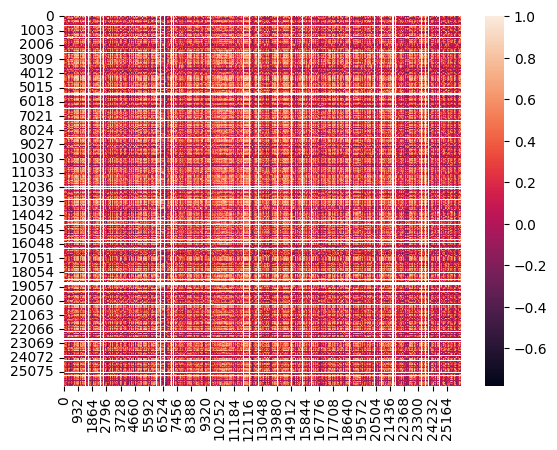

In [17]:
sns.heatmap(pearson_corr.sort_index().T.sort_index().T.values)

In [23]:
def cluster_correlate(c):
    corr_df = []
    for pid_a, pid_b in combinations(c, 2):
        try:
            corr_df.append(
                (
                    pid_a,
                    pid_b,
                    pearson_corr.loc[pid_a, pid_b],
                    spearman_corr.loc[pid_a, pid_b],
                )
            )
        except KeyError:
            continue
    df = pd.DataFrame(corr_df)
    df.columns = ["A", "B", "pearson", "spearman"]
    return df